<a href="https://colab.research.google.com/github/arkwith7/aSSIST_ML/blob/main/%EB%B0%95%ED%98%95%EC%8B%9D_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  **데이터 분석과제 **

In [1]:
# Step 1, Matplotlibs 업그레이드
!pip install matplotlib -U
!pip install seaborn -U
!pip install pandas -U

# Step 2, 한글 설치 및 사용 설정
!apt-get -qq install -y fonts-nanum
!fc-cache -fv
!rm ~/.cache/matplotlib -rf

# Step 3, 셀 실행 후 런타임 재시작

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 118.2 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.0.2 which is incompatible.
Selecting previously unselected package fonts-nanum.
(Reading database ... 122542 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20180306-3_all.deb ...
Unpacking fonts-na

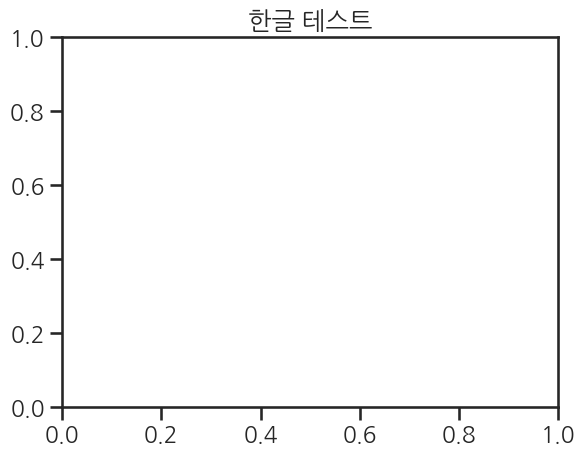

In [1]:
# Step 4, seaborn 환경설정
import seaborn as sns

sns.set_style('ticks')
sns.set_palette('colorblind')
sns.set_context('talk')

# Step 5, 한글 글꼴 설정
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = ['NanumGothic', 'sans-serif']
plt.rcParams['axes.unicode_minus'] = False

# 한글 설정 확인
%matplotlib inline
plt.title('한글 테스트')
plt.show()     

02. 분석 코드
 

2-1. data frame 로드

 

필요한 라이브러리를 import 하고, read_csv를 이용해 데이터값을 불러왔다.

In [39]:
import pandas as pd
from scipy.interpolate import make_interp_spline, BSpline

df = pd.read_csv('/content/sample_data/Data Busking.csv', encoding='utf-8')

2-2. 데이터셋 확인

 

In [41]:
print('\n')
print(df.head(3))
print("\n-------------------------------------------------\n")
print(df.info())
print("\n-------------------------------------------------\n")
print(df.describe())



  고객구분      구매일자   점포    채널 요일   카테고리명 PB 상품여부     구매시간대     구매금액  구매수량
0    A  20200509  익산점  대형마트  토   소프트캔디       N  16:23:43   1,690    1.0
1    A  20200509  익산점  대형마트  토  연제품 과세       N  16:23:43   3,490    1.0
2    A  20200509  익산점  대형마트  토    착향우유       N  16:23:43   1,050    1.0

-------------------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1066 entries, 0 to 1065
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   고객구분     1066 non-null   object 
 1   구매일자     1066 non-null   int64  
 2   점포       1066 non-null   object 
 3   채널       1066 non-null   object 
 4   요일       1066 non-null   object 
 5   카테고리명    1066 non-null   object 
 6   PB 상품여부  1065 non-null   object 
 7   구매시간대    1066 non-null   object 
 8   구매금액     1066 non-null   object 
 9   구매수량     1065 non-null   float64
dtypes: float64(1), int64(1), object(8)
memory usage: 83.4+ KB
None

--------------------------

2-3. EDA (시각화)

 

데이터 전처리에 앞서, 어떤 기준으로 처리할 것인지를 보기 위해서 EDA가 정말 중요하다고 생각한다.

이 EDA를 통해 처리 방향이 달라지고, 이 처리 결과값에 따라 예측에도 참 많은 영향을 미친다. 즉, 이는 데이터 분석에서 80% 이상을 차지한다고 해도 과언이 아닌 전처리 파트의 '핸들'이라고 생각한다.

2-3-1. 고객별 데이타 분포

 

가장 먼저, 첫 컬럼인 고객구분(고객4명)별  데이터 분포를 파이차트로 살펴보았다.

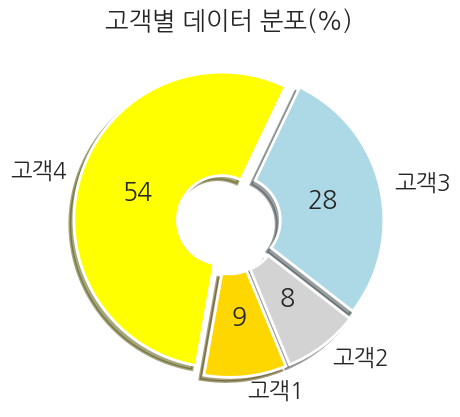

In [42]:
# 고객별 분포

target = df['고객구분']


ratio = [target.value_counts()['A'], target.value_counts()['B'], target.value_counts()['C'], target.value_counts()['D']]
labels = target.unique().tolist()
labels = ['고객1','고객2','고객3','고객4']
explode = [0.05, 0.05, 0.05, 0.05]
colors = ['gold', 'lightgray',  'lightblue', 'yellow']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 2}

plt.pie(ratio, labels=labels, explode=explode, 
        shadow=True, colors=colors, startangle=260, autopct='%.f',
        wedgeprops=wedgeprops);
plt.title("고객별 데이터 분포(%)");

2-3-2. 고객에 따른 요일별 구매 분포

 

 

고객별 데이이타 분포를 살펴봤으니 그 다음은 고객들의 '요일'컬럼을 이용해서 고객별 요일별 구매 특성을 살편본다.

> Indented block



         구매일자   점포   채널  카테고리명  PB 상품여부  구매시간대  구매금액  구매수량
고객구분 요일                                                   
A    목     16   16   16     16       16     16    16    16
     수      4    4    4      4        4      4     4     4
     일     22   22   22     22       21     22    22    22
     토     47   47   47     47       47     47    47    47
     화      7    7    7      7        7      7     7     7
B    금     13   13   13     13       13     13    13    13
     목      3    3    3      3        3      3     3     3
     수     19   19   19     19       19     19    19    19
     월      9    9    9      9        9      9     9     9
     일     29   29   29     29       29     29    29    29
     토      6    6    6      6        6      6     6     6
     화      9    9    9      9        9      9     9     9
C    금     35   35   35     35       35     35    35    35
     목     46   46   46     46       46     46    46    46
     수     49   49   49     49       49     49    49    

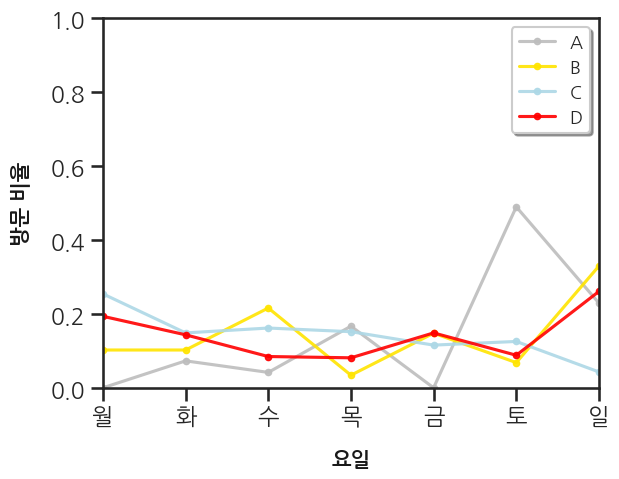

In [47]:
print(df.groupby([df['고객구분'],df['요일']]).count())

print('\n----------------------------------\n')
day_map = {'월': 0, '화': 1, '수': 2, '목': 3, '금': 4, '토': 5, '일': 6}
day_list = ['월', '화', '수', '목', '금', '토', '일']

def MakeDF(target, color):
    target_df = df[df['고객구분'] == target]
    total_count = target_df['요일'].count()
    
    # 모든 요일에 대해 값을 초기화합니다.
    week_data = {i: 0 for i in range(7)}
    
    # 기존 데이터를 업데이트합니다.
    week_data.update(target_df['요일'].map(day_map).value_counts().to_dict())
    
    # 전체 건수로 나누어 백분율을 계산합니다.
    week_data = {k: v/total_count for k, v in week_data.items()}
    
    # 정렬된 인덱스를 기준으로 DataFrame을 생성합니다.
    tg_df = pd.DataFrame.from_dict(week_data, orient='index').sort_index()
    
    x_labels = [day_list[i] for i in tg_df.index]
    y_labels = tg_df[0]  # column name은 0입니다.
    
    plt.plot(x_labels, y_labels, label=target, color=color, alpha=0.9, marker='.')

MakeDF('A', '#BDBDBD')
MakeDF('B', '#FFE400')
MakeDF('C', 'lightblue')
MakeDF('D', 'red')

plt.xlabel('요일', labelpad=15, fontdict=font, loc='center')
plt.ylabel('구매 비율', labelpad=15, fontdict=font)
plt.legend(ncol=1, fontsize=13, shadow=True)
plt.axis([0, 6, 0, 1]) 

plt.show()
